### Load data

In [1]:
import common
import pandas as pd
data_df, lects_df = common.load_lexirumah()
display(data_df.head())
display(lects_df.head())




Loading data...
Loaded data.


,ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment,Source
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10]
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10]
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10]
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10]
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10]


,ID,Name,Family,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment,Macroarea
0,abui1241-fuime,"Abui, Fuimelang",Timor-Alor-Pantar,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-petle,"Abui, Petleng",Timor-Alor-Pantar,-8.2144,124.593,"Kecamatan Teluk Mutiara, Kabupaten Alor, East ...",abui1241,abz,None,None,"[p/general, p/abui1241-petle]",None,Papunesia
2,abui1241-takal,"Abui, Takalelang",Timor-Alor-Pantar,-8.1887,124.6264,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,abui,None,"[p/general, p/abui1241-takal]",None,Papunesia
3,abui1241-ulaga,"Abui, Ulaga",Timor-Alor-Pantar,-8.403792,124.623702,"Kecamatan Alor Barat Daya, Kabupaten Alor, Eas...",abui1241,abz,None,None,"[p/general, p/abui1241-ulaga]",None,Papunesia
4,adan1251-lawah,"Adang, Lawahing",Timor-Alor-Pantar,-8.2109,124.4272,"Kecamatan Alor Barat Laut, Kabupaten Alor, Eas...",adan1251,adn,None,None,"[p/general, p/adan1251-lawah]",None,Papunesia


### Select and combine data

In [2]:
#lects_df = lects_df[["ID", "Name", "Family", "Region", "Latitude", "Longitude"]]
# Filter out proto-languages
lects_df = lects_df[~lects_df["Name"].str.startswith("proto-")]
lects_alorese = lects_df[lects_df["Name"].str.startswith("Alorese")]
# Four Western Lamaholot languages close to Alorese
#lects_lamaholot_related = lects_df[lects_df["Name"].str.contains(
#    "Lamalera|Lewotobi|Lewoingu|Lewolema", case=False, regex=True)]
lects_western_lamaholot = lects_df[lects_df["Iso"].isin(["adr", "lmr", "slp", "ila", "lwt"])]
# Flores-Lembata family, but with preceding WL varieties excluded (and Alorese excluded)
lects_flores_lembata = lects_df[(lects_df["ID"].str.startswith("lama") | lects_df["ID"].str.startswith("sika") | lects_df["ID"].str.startswith("keda")) & ~lects_df.index.isin(lects_western_lamaholot.index)]
# Timor-Alor-Pantar languages, but only Alor-Pantar languages, spoken adjacent to Alorese
lects_alor_pantar = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & lects_df["Region"].str.contains("Alor|Pantar", case=False, regex=True)]
# Other Timor-Alor-Pantor languages, spoken on Timor (and small island Kisar)
lects_timor = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & ~lects_df.index.isin(lects_alor_pantar.index)]
lects_selected_df = pd.concat([lects_alorese, lects_western_lamaholot, lects_flores_lembata, lects_alor_pantar, lects_timor])

# Join data with lect name from lects table
# This order (first select lects, then merge) fastest
data_langs_df = data_df[data_df["Lect_ID"].isin(lects_selected_df["ID"])]
data_langs_df = data_langs_df.rename(columns={"ID":"Form_ID"})
data_merged_df = data_langs_df.merge(lects_df, how="left", left_on="Lect_ID", right_on="ID")
data_merged_df = data_merged_df.drop("ID", axis=1)
display(data_merged_df.head())


,Form_ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment_x,Source,Name,...,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment_y,Macroarea
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia


### Compute phoneme distributions per language

In [3]:
   
data_grouped_lang = data_merged_df.groupby("Lect_ID")
data_agg = data_grouped_lang.aggregate({"Segments":list, "Name": "first", "Family": "first", "Latitude": "first", "Longitude":"first"})
data_agg["phone_prob"] = data_agg["Segments"].apply(common.phone_prob)
data_agg["biphone_prob"] = data_agg["Segments"].apply(common.biphone_prob)
display(data_agg)

,Segments,Name,Family,Latitude,Longitude,phone_prob,biphone_prob
Lect_ID,,,,,,,
abui1241-fuime,"[[a, d, i], [w, a, r, i], [i, j, e], [f, ɪ, r,...","Abui, Fuimelang",Timor-Alor-Pantar,-8.236,124.6783,"{'a': 0.19303482587064677, 'd': 0.013930348258...","{('<', 'a'): 0.01651143099068586, ('a', 'd'): ..."
abui1241-papun,"[[t, ɑ, m, ɑ, _, s, iː, l, ɑ, r], [ɑ, r, ʊ, ɪ,...",Papuna,Timor-Alor-Pantar,-8.334706,124.715864,"{'t': 0.05669050051072523, 'ɑ': 0.166496424923...","{('<', 't'): 0.02339688041594454, ('t', 'ɑ'): ..."
abui1241-petle,"[[a, d, i], [a, k, u, n], [l, e, ŋ], [t, u, ŋ]...","Abui, Petleng",Timor-Alor-Pantar,-8.2144,124.593,"{'a': 0.19322709163346613, 'd': 0.007968127490...","{('<', 'a'): 0.021346469622331693, ('a', 'd'):..."
abui1241-takal,"[[ä, d, i], [w, ä, r], [i, j, ä], [f, iː, r...","Abui, Takalelang",Timor-Alor-Pantar,-8.1887,124.6264,"{'ä': 0.194251497005988, 'd': 0.0148502994011...","{('<', 'ä'): 0.013119533527696793, ('ä', 'd'..."
abui1241-ulaga,"[[a, d, i], [w, a, r, i], [i, j, a], [f, i, r,...","Abui, Ulaga",Timor-Alor-Pantar,-8.403792,124.623702,"{'a': 0.18317073170731707, 'd': 0.015121951219...","{('<', 'a'): 0.013990394654416372, ('a', 'd'):..."
...,...,...,...,...,...,...,...
teiw1235-adiab,"[[b, u, l, a], [w, a, r], [w, u, r], [dʒ, i, f...","Teiwa, Adiabang",Timor-Alor-Pantar,-8.326,124.228,"{'b': 0.02823179791976226, 'u': 0.057454185240...","{('<', 'b'): 0.013130898645876077, ('b', 'u'):..."
teiw1235-nule,"[[g, u, n, a, ʔ], [w, a, r], [w, u, r], [j, i,...","Teiwa, Nule",Timor-Alor-Pantar,-8.3775,124.2303,"{'g': 0.04088345864661654, 'u': 0.043703007518...","{('<', 'g'): 0.014156508061344868, ('g', 'u'):..."
tiay1238,"[[n, oː], [a, t, iː], [k, u, i], [k, a, g, i, ...",Tiyei,Timor-Alor-Pantar,-8.295197,124.756008,"{'n': 0.03647586980920314, 'oː': 0.01066217732...","{('<', 'n'): 0.00702576112412178, ('n', 'oː'):..."


### Construct shared feature matrix for all lects

In [4]:
phone_prob_matrix = common.shared_feature_matrix(data_agg, "phone_prob")
biphone_prob_matrix = common.shared_feature_matrix(data_agg, "biphone_prob")

display(phone_prob_matrix)
display(biphone_prob_matrix)
    

,tʰ,ṳ,ə,iˑ,dː,o̤,ɜː,t̪,ĭ,uː,...,s,á,e̯,ɛ̘,lˑ,sː,é,ɤ̃,c,ɲ
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000498,...,0.014428,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
abui1241-papun,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.008682,...,0.034219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
abui1241-petle,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.005976,...,0.013944,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
abui1241-takal,0.000479,0.0,0.000240,0.0,0.0,0.0,0.0,0.0,0.00000,0.002635,...,0.010299,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000240
abui1241-ulaga,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.002927,...,0.015854,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teiw1235-adiab,0.000000,0.0,0.013868,0.0,0.0,0.0,0.0,0.0,0.00000,0.003467,...,0.033185,0.000495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
teiw1235-nule,0.000000,0.0,0.012688,0.0,0.0,0.0,0.0,0.0,0.00047,0.004699,...,0.027256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
tiay1238,0.000000,0.0,0.002245,0.0,0.0,0.0,0.0,0.0,0.00000,0.002806,...,0.033109,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


r         u    n         i         s         i    j  \
                       s         m   dʒ         m         ɑ         e    b   
Lect_ID                                                                      
abui1241-fuime  0.000000  0.000000  0.0  0.000847  0.000000  0.006774  0.0   
abui1241-papun  0.000433  0.000000  0.0  0.000000  0.001733  0.000000  0.0   
abui1241-petle  0.000000  0.001642  0.0  0.000000  0.000000  0.001642  0.0   
abui1241-takal  0.000416  0.000208  0.0  0.000208  0.000000  0.000208  0.0   
abui1241-ulaga  0.000209  0.001044  0.0  0.000626  0.000000  0.005847  0.0   
...                  ...       ...  ...       ...       ...       ...  ...   
teiw1235-adiab  0.000000  0.001231  0.0  0.002052  0.000000  0.000000  0.0   
teiw1235-nule   0.000000  0.001180  0.0  0.001180  0.000000  0.000000  0.0   
tiay1238        0.000468  0.001874  0.0  0.000468  0.000000  0.000468  0.0   
wers1238-marit  0.000000  0.001938  0.0  0.001938  0.000000  0.000000  0.0   
wers1238-taram  0.000000  0.001975  0.0  0.000846  0.000000  0.000000  0.0   

                  ɛ    a         ɛ  ...         e    ø         +            \
                  +   tʃ         d  ...         x    k         p         f   
Lect_ID                             ...                                      
abui1241-fuime  0.0  0.0  0.000000  ...  0.000000  0.0  0.000423  0.000423   
abui1241-papun  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
abui1241-petle  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
abui1241-takal  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
abui1241-ulaga  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
...             ...  ...       ...  ...       ...  ...       ...       ...   
teiw1235-adiab  0.0  0.0  0.000000  ...  0.000821  0.0  0.000000  0.000000   
teiw1235-nule   0.0  0.0  0.000000  ...  0.000393  0.0  0.000000  0.000000   
tiay1238        0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   
wers1238-marit  0.0  0.0  0.000242  ...  0.000000  0.0  0.000000  0.000000   
wers1238-taram  0.0  0.0  0.000000  ...  0.000000  0.0  0.000000  0.000000   

                 kʰ    ŋ    s    _         r        ä  
                 ẽ    s    m    β         g         g  
Lect_ID                                                 
abui1241-fuime  0.0  0.0  0.0  0.0  0.000000  0.000000  
abui1241-papun  0.0  0.0  0.0  0.0  0.000000  0.000000  
abui1241-petle  0.0  0.0  0.0  0.0  0.000000  0.000000  
abui1241-takal  0.0  0.0  0.0  0.0  0.000000  0.000208  
abui1241-ulaga  0.0  0.0  0.0  0.0  0.000000  0.000000  
...             ...  ...  ...  ...       ...       ...  
teiw1235-adiab  0.0  0.0  0.0  0.0  0.000000  0.000000  
teiw1235-nule   0.0  0.0  0.0  0.0  0.000000  0.000000  
tiay1238        0.0  0.0  0.0  0.0  0.000468  0.000000  
wers1238-marit  0.0  0.0  0.0  0.0  0.000000  0.000000  
wers1238-taram  0.0  0.0  0.0  0.0  0.000000  0.000000  

[104 rows x 2398 columns]

### Perform dimensionality reduction

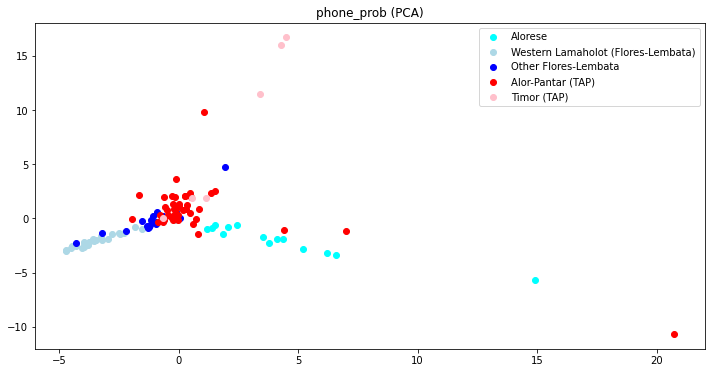

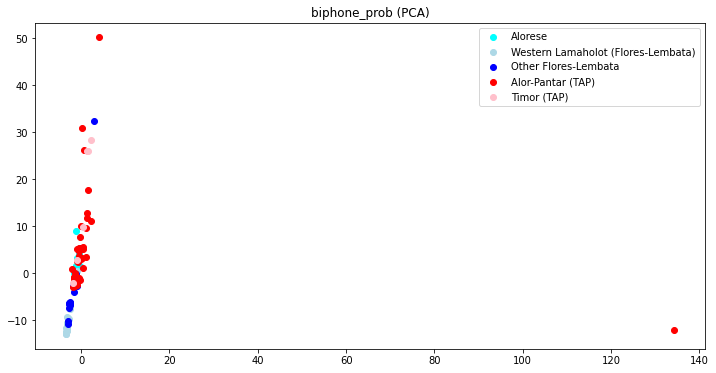

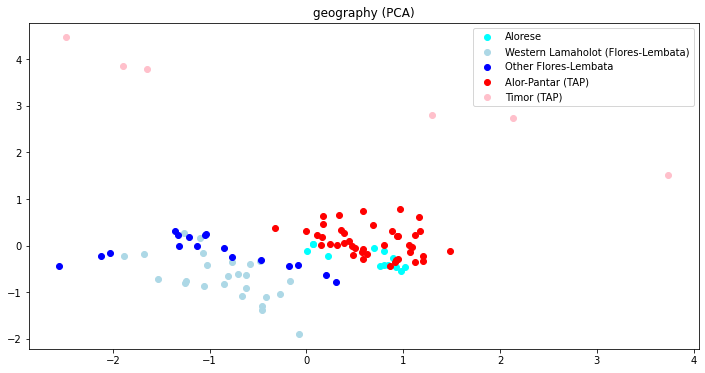

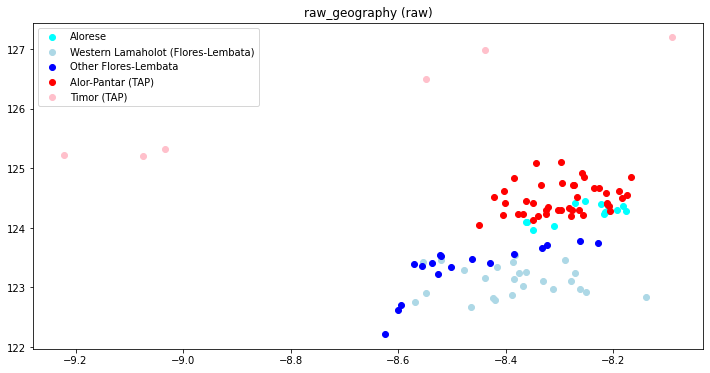

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS


# def create_colors_labels(lects):
#     def color_lect(lect):
#         if lect in list(lects_tap["ID"]):
#             return "red", "Timor-Alor-Pantar"
#         elif lect in list(lects_alorese["ID"]):
#             return "black", "Alorese"
#         elif lect in list(lects_lamaholot_related["ID"]):
#             return "cyan", "Lamaholot"
#         else:
#             raise ValueError("Unsupported lect")
#     return [color_lect(lect) for lect in lects]

PLOT_LABELS = False

#TODO: check outliers, smaller dots, bigger plots
# TODO: Biphone prob with transition probabilities
# TODO: Phone and biphone existence probabilities

# Define language groups for plots
language_groups = {"Alorese": {"color": "cyan", "lects": lects_alorese["ID"]},
                   "Western Lamaholot (Flores-Lembata)": {"color": "lightblue", "lects": lects_western_lamaholot["ID"]},
                   "Other Flores-Lembata": {"color": "blue", "lects": lects_flores_lembata["ID"]},
                   "Alor-Pantar (TAP)": {"color": "red", "lects": lects_alor_pantar["ID"]},
                   "Timor (TAP)": {"color": "pink", "lects": lects_timor["ID"]}
                  }

dim_reds_available = {"PCA": PCA(n_components=2)}#,"MDS": MDS()}

analyses = {"phone_prob": phone_prob_matrix,
            "biphone_prob": biphone_prob_matrix,
            "geography": data_agg[["Latitude", "Longitude"]].fillna(0),
            "raw_geography": ["Latitude", "Longitude"],
            }

for study_label, study_data in analyses.items():
    if study_label == "raw_geography":
        reduce = False
        plot_cols = study_data
        dim_reds = {"raw": plot_cols}
    else:
        reduce = True
        dim_reds = dim_reds_available
    for dr_label, dr in dim_reds.items():
        common.reduce_plot(study_label, study_data, dr_label, dr, data_agg, language_groups, PLOT_LABELS, reduce)
        
        